In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread("/home/sergio/Pictures/Webcam/tester_triangulo.jpg")

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

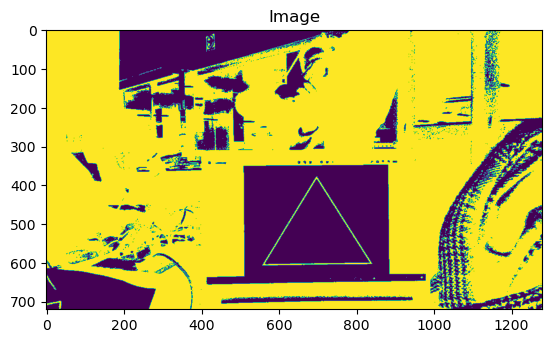

In [7]:
plt.imshow(thresh)
plt.title('Image')
plt.show()

In [11]:
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

In [13]:
def detect_shape(c):
    # Compute perimeter of contour and perform contour approximation
    shape = ""
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.04 * peri, True)

    # Triangle
    if len(approx) == 3:
        shape = "triangle"

    # Square or rectangle
    elif len(approx) == 4:
        (x, y, w, h) = cv2.boundingRect(approx)
        ar = w / float(h)

        # A square will have an aspect ratio that is approximately
        # equal to one, otherwise, the shape is a rectangle
        shape = "square" if ar >= 0.95 and ar <= 1.05 else "rectangle"

    # Pentagon
    elif len(approx) == 5:
        shape = "pentagon"

    # Hexagon
    elif len(approx) == 6:
        shape = "hexagon"

    # Octagon 
    elif len(approx) == 8:
        shape = "octagon"

    # Star
    elif len(approx) == 10:
        shape = "star"

    # Otherwise assume as circle or oval
    else:
        shape = "circle"

    return shape

In [14]:
for c in cnts:
    # Identify shape
    shape = detect_shape(c)
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    cv2.putText(img, shape, (cX - 20, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (36,255,12), 2)


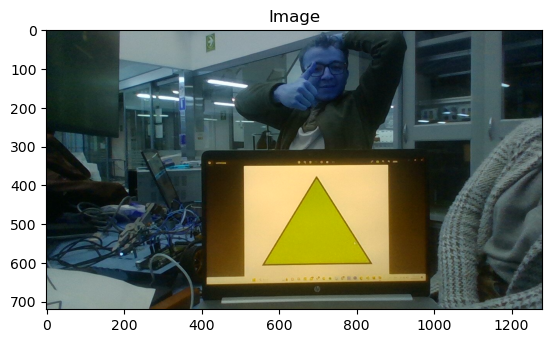

In [15]:
#cv2.imshow('image', image)
plt.imshow(img)
plt.title('Image')
plt.show()